<a href="https://colab.research.google.com/github/jov580/astro-vezbe/blob/main/Kretanje_Sunca_i_vreme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ephem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.1 MB/s eta 0:00:00


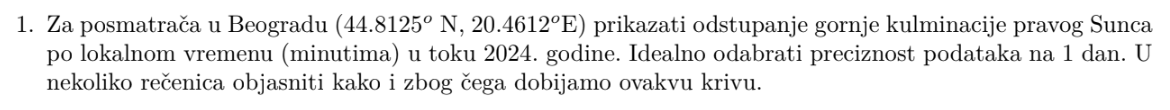

In [4]:
from ephem import *
from pandas import *
import matplotlib.pyplot as plt

posmatrac = Observer()
posmatrac.lon = '44.8125'
posmatrac.lat = '20.4612'

sunce = Sun()

datumi = []
odstupanja = []
nula = []

for datum in date_range('2024/1/1', '2024/12/31'):
  posmatrac.date = datum
  datumi.append(datum)
  nula.append(0)

  if datum in date_range('2024/3/31', '2024/10/27'):
    odstupanja.append((posmatrac.next_transit(sunce).tuple()[3] - 9.5  + 1) * 60 + posmatrac.next_transit(sunce).tuple()[4] + posmatrac.next_transit(sunce).tuple()[5] / 60)
  else:
    odstupanja.append((posmatrac.next_transit(sunce).tuple()[3] - 9.5 ) * 60 + posmatrac.next_transit(sunce).tuple()[4] + posmatrac.next_transit(sunce).tuple()[5] / 60)

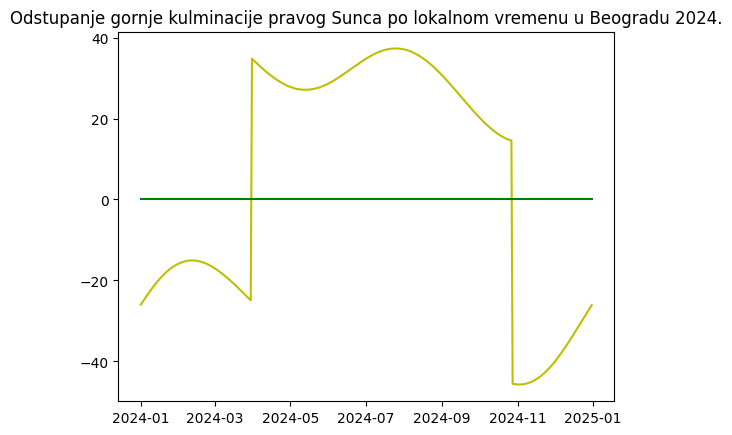

In [5]:
plt.figure()
plt.title('Odstupanje gornje kulminacije pravog Sunca po lokalnom vremenu u Beogradu 2024.')
plt.plot(datumi, odstupanja, color = 'y')
plt.plot(datumi, nula, color = "g")
plt.show()

**Objašnjenje za rešenje prvog zadatka:**
Petljom prolatimo kroz sve datume u 2024. godini, i za svaki od njih nalazimo vreme pravog podneva korišćenjem funkcije next_transit. Od ovog vremena oduzimamo 12 sati, što uzimamo kao podne u svakodnevnom životu i time dobijamo odstupanje pravog od našeg podneva za svaki dan u godini. Možemo primetiti dve nagle promene na grafiku, jedan nagli rast (31. mart) i jedan nagli pad (27. oktobar). Ovi datumi predstavljaju pomeranje časovnika u Srbiji, pa odatle dolaze ove nagle promene.

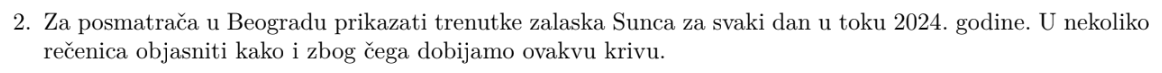

In [13]:
posmatrac = Observer()
posmatrac.lon = '44.8125'
posmatrac.lat = '20.4612'

sunce = Sun()

datumi = []
zalasci = []

for datum in date_range('2024/1/1', '2024/12/31'):
  posmatrac.date = datum
  datumi.append(datum)

  if datum in date_range('2024/3/31', '2024/10/27'):
    zalasci.append((posmatrac.next_setting(sunce).tuple()[3] + 1.5 + 1) + posmatrac.next_setting(sunce).tuple()[4] / 60 + posmatrac.next_setting(sunce).tuple()[5] / 3600)
  else:
    zalasci.append((posmatrac.next_setting(sunce).tuple()[3] + 1.5 ) + posmatrac.next_setting(sunce).tuple()[4] / 60 + posmatrac.next_setting(sunce).tuple()[5] / 3600)

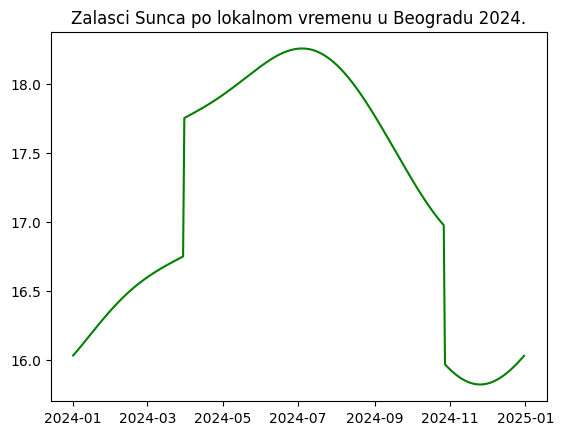

In [14]:
plt.figure()
plt.title('Zalasci Sunca po lokalnom vremenu u Beogradu 2024.')
plt.plot(datumi, zalasci, color = 'g')
plt.show()

**Objašnjenje za rešenje drugog zadatka:**
Petljmo prolazimo kroz sve datume u 2024. godini. Za svaki datum korišćenjem funkcije next_setting dobijamo tačno vreme zalaska Sunca za posmatrača koji se nalazi u Beogradu. Kao i u prethodnom zadatku, možemo primetiti dva nagla odstupanja. Kao i u prethodnom zadatku, ove promene predstavljaju pomeranja časovnika u Srbiji (31. mart - 1h unapred, 27. oktobar - 1h unazad).

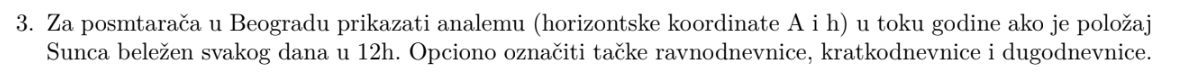

In [29]:
posmatrac = Observer()
posmatrac.lon = '44.8125'
posmatrac.lat = '20.4612'

sunce = Sun(posmatrac)

azimuti = []
visine = []

for datum in date_range('2024/1/1 12:00:00', '2024/12/31 12:00:00'):
  posmatrac.date = datum
  sunce = Sun(posmatrac)

  azimuti.append(sunce.az)
  visine.append(sunce.alt)

print(azimuti)
print(visine)

[3.9603517055511475, 3.9601595401763916, 3.9600934982299805, 3.9601547718048096, 3.9603445529937744, 3.9606640338897705, 3.9611146450042725, 3.961697578430176, 3.962413787841797, 3.9632647037506104, 3.9642515182495117, 3.9653754234313965, 3.9666378498077393, 3.9680395126342773, 3.9695816040039062, 3.9712653160095215, 3.9730911254882812, 3.975059986114502, 3.9771721363067627, 3.9794280529022217, 3.981828212738037, 3.984372854232788, 3.9870619773864746, 3.989895820617676, 3.99287486076355, 3.9959986209869385, 3.999267816543579, 4.002681732177734, 4.006241321563721, 4.009945869445801, 4.013794898986816, 4.017788887023926, 4.021927356719971, 4.026210308074951, 4.030636787414551, 4.035206317901611, 4.039919376373291, 4.044774532318115, 4.049771308898926, 4.0549092292785645, 4.060187816619873, 4.065605640411377, 4.071162700653076, 4.076857566833496, 4.08268928527832, 4.088656902313232, 4.094758033752441, 4.100991249084473, 4.10735559463501, 4.11384916305542, 4.120469093322754, 4.127214431762

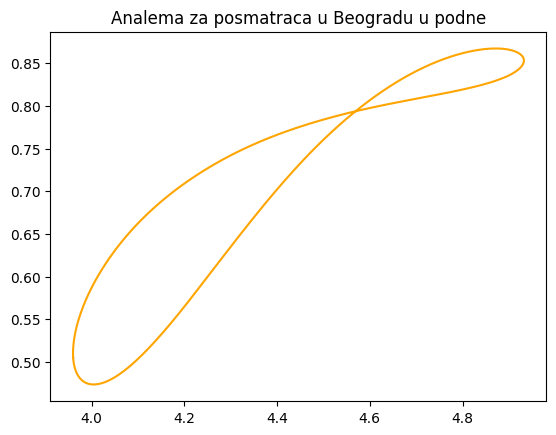

In [31]:
plt.figure()
plt.title('Analema za posmatraca u Beogradu u podne')
plt.plot(azimuti, visine, color = 'orange')
plt.show()